# Typical Time History of Solar Power Production at UIUC

Please see the ``README`` for instructions about accessing the data.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Upload datasets

df_201* is the solar irradiance data

farm_201* refers to real solar farm data

## How to handle missing data

1. Upload the solar farm datasets
2. Resample by hourly mean

Doing this will create space for the missing time by filling with NaNs. 

3. Upload the solar irradiance datasets
4. Calculate power based on the solar irradiance for each year. 

Now we can combine the datasets such that where the solar farm dataset has NaN values, it will be replaced by a calculated value from the irradiance dataset. 

In [2]:
# define path to data
path = "../../data/" 

In [3]:
# solar irradiation data
df_2016 = pd.read_csv(path+"dni_2016.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2016['time'] = pd.to_datetime(df_2016[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2016.index = pd.to_datetime(df_2016.time)

df_2017 = pd.read_csv(path+"dni_2017.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2017['time'] = pd.to_datetime(df_2017[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2017.index = pd.to_datetime(df_2017.time)

df_2018 = pd.read_csv(path+"dni_2018.csv", skiprows=2, usecols=['Year','Month','Day','Hour', 'Minute','DHI', 'DNI', 'Temperature'])
df_2018['time'] = pd.to_datetime(df_2018[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_2018.index = pd.to_datetime(df_2018.time)

In [4]:
# data from the solar farm
farm_2016 = pd.read_csv(path+'solardata_2016.csv', parse_dates=True, index_col='time')
farm_2016 = farm_2016.resample('H').mean()[:8760]

farm_2017 = pd.read_csv(path+'solardata_2017.csv', parse_dates=True, index_col='time')
farm_2017 = farm_2017.resample('H').mean()

farm_2018 = pd.read_csv(path+'solardata_2018.csv', parse_dates=True, index_col='time')
farm_2018 = farm_2018.resample('H').mean()

In [5]:
len(farm_2016)

8760

In [6]:
all_data = pd.read_csv(path+"solardata.csv", parse_dates=True, index_col='time')

In [7]:
all_hourly = all_data.resample('H').mean()

In [8]:
yearly_group = all_hourly.groupby(all_hourly.index.year)

farm_2016_hourly = yearly_group.get_group(2016)[:8760]
farm_2017_hourly = yearly_group.get_group(2017)
farm_2018_hourly = yearly_group.get_group(2018)

In [9]:
farm_2018_hourly

,measured,inverted
time,,
2018-01-01 00:00:00,NaN,NaN
2018-01-01 01:00:00,NaN,NaN
2018-01-01 02:00:00,NaN,NaN
2018-01-01 03:00:00,NaN,NaN
2018-01-01 04:00:00,NaN,NaN
...,...,...
2018-12-31 19:00:00,-13.375,0.0
2018-12-31 20:00:00,-12.600,0.0
2018-12-31 21:00:00,-11.050,0.0


In [10]:
# time converters from datetime to minutes
year_minutes = lambda x: (x.year-2013)*525600 + (x.month-1)*43800  + (x.day-1)*1440 + (x.hour)*60 + x.minute
month_minutes = lambda x: (x.day-1)*1440 + (x.hour)*60 + x.minute
year_hours = lambda x: (x.year-2013)*8760 + (x.month-1)*730 + (x.day-1)*24 + (x.hour)

In [11]:
df_2016_hourly = df_2016.resample('H').mean()[:8760]
df_2017_hourly = df_2017.resample('H').mean()
df_2018_hourly = df_2018.resample('H').mean()

## Step 2: Define and calculate the declination for each day

The formula for declination is

$\delta = 23.44*\sin(\frac{\pi}{180}\frac{360}{365}(N+284))$

The factor of $\pi/180$ in the sine argument is necessary because numpy 
defaults to radians, rather than degrees.

In [12]:
# define the calculation for declination (delta). 
delta = lambda x: 23.44*np.sin(np.pi/180*(360/365)*(x+284))

In [13]:
# the deltas are still not quite correct, so I'm going to force it to be correct. 
# This will not be the prettiest of solutions. 
dec = {'delta':[]}

for day in range(1,366):
  hourly_dec = []
  for hour in range(24):
    hourly_dec.append(delta(day))
  # print(len(hourly_dec))
  dec['delta'].extend(hourly_dec)

dec = pd.Series(dec)
print(len(dec['delta']))

8760


In [14]:
df_2016_hourly['delta'] = dec['delta']
df_2017_hourly['delta'] = dec['delta']
df_2018_hourly['delta'] = dec['delta']

In [15]:
df_2016_hourly

,Year,Month,Day,Hour,Minute,DHI,DNI,Temperature,delta
time,,,,,,,,,
2016-01-01 00:00:00,2016.0,1.0,1.0,0.0,15.0,0.0,0.0,-6.5,-23.001824
2016-01-01 01:00:00,2016.0,1.0,1.0,1.0,15.0,0.0,0.0,-6.0,-23.001824
2016-01-01 02:00:00,2016.0,1.0,1.0,2.0,15.0,0.0,0.0,-6.0,-23.001824
2016-01-01 03:00:00,2016.0,1.0,1.0,3.0,15.0,0.0,0.0,-7.0,-23.001824
2016-01-01 04:00:00,2016.0,1.0,1.0,4.0,15.0,0.0,0.0,-8.0,-23.001824
...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,2016.0,12.0,30.0,19.0,15.0,0.0,0.0,-1.0,-23.076066
2016-12-30 20:00:00,2016.0,12.0,30.0,20.0,15.0,0.0,0.0,-0.5,-23.076066
2016-12-30 21:00:00,2016.0,12.0,30.0,21.0,15.0,0.0,0.0,0.0,-23.076066


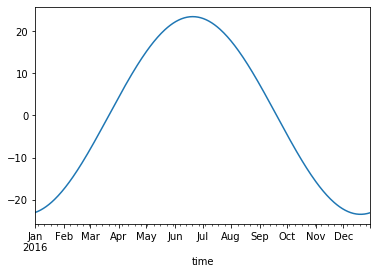

In [16]:
# verify that delta is correct
angle = df_2016_hourly['delta'].resample('D').mean()
angle.plot()

## Step 3: Calculate the hourly Total Irradiance ($G_T$) and Power (P)

This is the model for power output of a solar panel \
$P = G_T\tau_{pv}\eta_{ref}A[1-\gamma(T-25)]$

where $G_T$ is given by \
$G_T = DNI*\cos(\beta+\delta-lat)+DHI*\frac{180-\beta}{180}$

- $\tau$ is the "transmittance of the PV module's outside layer"
- $\gamma$ is the "temperature coefficient
- A is the area covered by the solar panels
- $\eta$ is the PV module efficiency
- $\beta$ is the tilt of the solar panels
- T is the temperature (in $^\circ$C)

These formulas were obtained from Garcia et. al. Which can be found at this link
https://inldigitallibrary.inl.gov/sites/sti/sti/6531825.pdf 

The values for $\gamma$, $\tau$ and $\eta$ are not known for the UIUC solar farm, thus values from Garcia et. al are also used. Later, we will normalize the data set and rescale it by the rated power to fix this problem. 

In [17]:
# approximate coordinates of champaign-urbana
lat = 40.13
lon = -88.22

# these values are from Garcia et. al
# Currently, the maximum power output is too high. 
eta = 0.15
tau = 0.9
gam = 0.0045 # changed this from 0.0045 to 0.009 to see if I get a more accurate max value.

# these values are from the iSEE facts sheet regarding UIUC's solar farm
beta = 20
A = 84174.61*0.6 # [m^2] or 20.8 acres, but a coverage factor of 60%

# define the formulae
G = lambda dni, delt, dhi: dni*np.cos((np.pi/180)*(beta + delt - lat)) + dhi*(180-beta)/180
P = lambda Gt, T: Gt*tau*eta*A*(1-gam*(T-25))

In [18]:
sol_irr = {'G':[]}
for i in range(len(df_2016_hourly)):
  dni = df_2016_hourly.iloc[i]['DNI']
  dhi = df_2016_hourly.iloc[i]['DHI']
  delt = df_2016_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2016_hourly['G'] = sol_irr['G']

power = {'Power':[]}
for i in range(len(df_2016_hourly)):
  gt = df_2016_hourly.iloc[i]['G']
  T = df_2016_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2016_hourly['power'] = power['Power']

In [19]:
sol_irr = {'G':[]}
for i in range(len(df_2017_hourly)):
  dni = df_2017_hourly.iloc[i]['DNI']
  dhi = df_2017_hourly.iloc[i]['DHI']
  delt = df_2017_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2017_hourly['G'] = sol_irr['G']

power = {'Power':[]}
for i in range(len(df_2017_hourly)):
  gt = df_2017_hourly.iloc[i]['G']
  T = df_2017_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2017_hourly['power'] = power['Power']

In [20]:
sol_irr = {'G':[]}
for i in range(len(df_2018_hourly)):
  dni = df_2018_hourly.iloc[i]['DNI']
  dhi = df_2018_hourly.iloc[i]['DHI']
  delt = df_2018_hourly.iloc[i]['delta']
  sol_irr['G'].append(G(dni, delt, dhi))
df_2018_hourly['G'] = sol_irr['G']

power = {'Power':[]}
for i in range(len(df_2018_hourly)):
  gt = df_2018_hourly.iloc[i]['G']
  T = df_2018_hourly.iloc[i]['Temperature']
  power['Power'].append(P(gt, T))
df_2018_hourly['power'] = power['Power']

In [21]:
# import required libraries to normalize
from sklearn import preprocessing

def normalize(df, col):
  """
  This function accepts a dataframe and a column label
  and returns a normalized version of the column as a 
  pandas series.

  Parameters:
  -----------
  df : Pandas dataframe
    The dataframe containing the column you'd like to normalize.
  col : string
    The label of the column you wish to normalize

  Returns: 
  --------
  normalized_col : Pandas series
    The normalized column of data.
  """
  column = df[[col]].values.astype(float)
  min_max_scaler = preprocessing.MinMaxScaler()
  column_scaled = min_max_scaler.fit_transform(column)
  
  normalized_col = pd.Series({col+'_norm':column_scaled})

  return normalized_col

In [22]:
rated_power = 4.8*1000 # [MWe]
norm_2016 = normalize(df_2016_hourly, 'power')
df_2016_hourly['power_norm'] = norm_2016['power_norm']*rated_power

norm_2017 = normalize(df_2017_hourly, 'power')
df_2017_hourly['power_norm'] = norm_2017['power_norm']*rated_power

norm_2018 = normalize(df_2018_hourly, 'power')
df_2018_hourly['power_norm'] = norm_2018['power_norm']*rated_power

In [23]:
df_2018_hourly.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,Temperature,delta,G,power,power_norm
time,,,,,,,,,,,,
2018-01-01 00:00:00,2018.0,1.0,1.0,0.0,15.0,0.0,0.0,-21.10,-23.001824,0.0,0.0,0.0
2018-01-01 01:00:00,2018.0,1.0,1.0,1.0,15.0,0.0,0.0,-21.85,-23.001824,0.0,0.0,0.0
2018-01-01 02:00:00,2018.0,1.0,1.0,2.0,15.0,0.0,0.0,-22.55,-23.001824,0.0,0.0,0.0
2018-01-01 03:00:00,2018.0,1.0,1.0,3.0,15.0,0.0,0.0,-23.25,-23.001824,0.0,0.0,0.0
2018-01-01 04:00:00,2018.0,1.0,1.0,4.0,15.0,0.0,0.0,-23.80,-23.001824,0.0,0.0,0.0


In [24]:
farm_2018_hourly.head()

,measured,inverted
time,,
2018-01-01 00:00:00,NaN,NaN
2018-01-01 01:00:00,NaN,NaN
2018-01-01 02:00:00,NaN,NaN
2018-01-01 03:00:00,NaN,NaN
2018-01-01 04:00:00,NaN,NaN


In [25]:
df_2016_hourly['power_data'] = farm_2016_hourly['inverted']
df_2017_hourly['power_data'] = farm_2017_hourly['inverted']
df_2018_hourly['power_data'] = farm_2018_hourly['inverted']

df_2018_hourly.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,Temperature,delta,G,power,power_norm,power_data
time,,,,,,,,,,,,,
2018-01-01 00:00:00,2018.0,1.0,1.0,0.0,15.0,0.0,0.0,-21.10,-23.001824,0.0,0.0,0.0,NaN
2018-01-01 01:00:00,2018.0,1.0,1.0,1.0,15.0,0.0,0.0,-21.85,-23.001824,0.0,0.0,0.0,NaN
2018-01-01 02:00:00,2018.0,1.0,1.0,2.0,15.0,0.0,0.0,-22.55,-23.001824,0.0,0.0,0.0,NaN
2018-01-01 03:00:00,2018.0,1.0,1.0,3.0,15.0,0.0,0.0,-23.25,-23.001824,0.0,0.0,0.0,NaN
2018-01-01 04:00:00,2018.0,1.0,1.0,4.0,15.0,0.0,0.0,-23.80,-23.001824,0.0,0.0,0.0,NaN


In [26]:
# first replace power_data 
df_2016_hourly.power_data.fillna(df_2016_hourly.power_norm, inplace=True)
df_2017_hourly.power_data.fillna(df_2017_hourly.power_norm, inplace=True)
df_2018_hourly.power_data.fillna(df_2018_hourly.power_norm, inplace=True)

# then replace power_norm
df_2016_hourly.power_norm.fillna(0, inplace=True)
df_2017_hourly.power_norm.fillna(0, inplace=True)
df_2018_hourly.power_norm.fillna(0, inplace=True)

4799.999999999999
4731.0


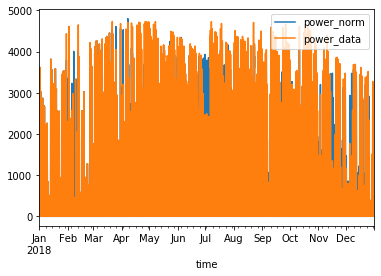

In [27]:
final_2018 = df_2018_hourly[['power_norm','power_data']]
print(final_2018.power_norm.max())
print(final_2018.power_data.max())
final_2018.plot()

In [28]:
final_2016 = df_2016_hourly[['power_norm','power_data']]
final_2017 = df_2017_hourly[['power_norm','power_data']]

In [29]:
%%capture
# convert time to hour number


final_2016.reset_index(inplace=True)
final_2017.reset_index(inplace=True)
final_2018.reset_index(inplace=True)

final_2016['time'] = final_2016.index
final_2017['time'] = final_2017.index
final_2018['time'] = final_2018.index

## Execute RAVEN simulation

In [30]:
final_2016

,time,power_norm,power_data
0,0,0.0,0.0
1,1,0.0,0.0
2,2,0.0,0.0
3,3,0.0,0.0
4,4,0.0,0.0
...,...,...,...
8755,8755,0.0,0.0
8756,8756,0.0,0.0
8757,8757,0.0,0.0
8758,8758,0.0,0.0


In [31]:
# writes the header file for RAVEN
fname = 'annual_sun201'
sun_keys = [fname + str(i) + '.csv' for i in range(6,9,1)]
header_file = pd.DataFrame({'scaling':np.zeros(len(sun_keys), dtype=np.int8), 'filename':sun_keys})
header_file.to_csv(path+'annual_sun_H.csv')
# header_file

In [32]:
final_2016.to_csv(path+'annual_sun2016.csv')
final_2017.to_csv(path+'annual_sun2017.csv')
final_2018.to_csv(path+'annual_sun2018.csv')

In [33]:
!ls ~/Research/data/

2014_2019_uiuc_electricity_demand.csv  dni_2013.csv
2015_uiuc_electricity_demand.csv       dni_2014.csv
2016_uiuc_electricity_demand.csv       dni_2015.csv
2017_uiuc_electricity_demand.csv       dni_2016.csv
2018_uiuc_electricity_demand.csv       dni_2017.csv
2019_uiuc_electricity_demand.csv       dni_2018.csv
annual_load2015.csv		       grid_cdf.csv
annual_load2016.csv		       gridload_data
annual_load2017.csv		       illinoiswindhighresolution
annual_load2018.csv		       lincoln_weather.csv
annual_load_H.csv		       __MACOSX
annual_steam2015.csv		       romMeta.csv
annual_steam2016.csv		       romMeta.xml
annual_steam2017.csv		       solardata_2015.csv
annual_steam2018.csv		       solardata_2016.csv
annual_steam_H.csv		       solardata_2017.csv
annual_sun2016.csv		       solardata_2018.csv
annual_sun2017.csv		       solardata_2019.csv
annual_sun2018.csv		       solardata.csv
annual_sun_H.csv		       solar_farm_data
annual_wind2011.csv		       solar_model_data
annual_wind2012.csv		   

In [34]:
!~/Research/raven/raven_framework ~/Research/2020-dotson-optimal-sizing/inputfiles/typical_solar.xml

CONDA
raven_libraries          /home/dotson/anaconda3/envs/raven_libraries
Running RAVEN in "opt" mode.
/home/dotson/Research/raven/framework/utils/utils.py:579: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, os.path
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/statsmodels/base/wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'colle

(    0.04 sec) HistorySet               : DEBUG           -> Reading data from "/home/dotson/Research/data/annual_sun2018.csv.csv"
(    0.06 sec) STEP IOCOMBINED          : Message         -> ***       Run finished        ***
(    0.06 sec) STEP IOCOMBINED          : Message         -> ***     Closing the step      ***
(    0.06 sec) STEP IOCOMBINED          : Message         -> ***        Step closed        ***
(    0.06 sec) SIMULATION               : Message         -> -- End step read of type: IOStep                               --

(    0.06 sec) SIMULATION               : Message         -> -- Beginning step get_history of type: PostProcess                  --
(    0.06 sec) STEP SINGLERUN           : Message         -> ***  Beginning initialization ***
(    0.06 sec) STEP SINGLERUN           : DEBUG           -> jobHandler initialized
(    0.06 sec) STEP SINGLERUN           : DEBUG           -> for the role Model  the item of class PostProcessor   and name typicalHistory  has b

(    0.23 sec) HistorySet               : DEBUG           -> Printing metadata XML: "TypicalSolar.xml"
(    0.23 sec) STEP IOCOMBINED          : Message         -> ***       Run finished        ***
(    0.23 sec) STEP IOCOMBINED          : Message         -> ***     Closing the step      ***
(    0.23 sec) STEP IOCOMBINED          : Message         -> ***        Step closed        ***
(    0.23 sec) SIMULATION               : Message         -> -- End step write of type: IOStep                              --

--------------------------------------------------
There were 1 warnings during the simulation run:
(1 time) DataObject._convertToDict can be a slow operation and should be avoided where possible!
--------------------------------------------------
(    0.23 sec) SIMULATION               : Message         -> Run complete!


In [35]:
!rm -rf ~/Research/data/annual_sun*

In [36]:
typical_solar = pd.read_csv(path+"TypicalSolar_0.csv")

typical_solar['date'] = pd.date_range(start='1/1/2018', end='1/1/2019', freq='H')[:8760]

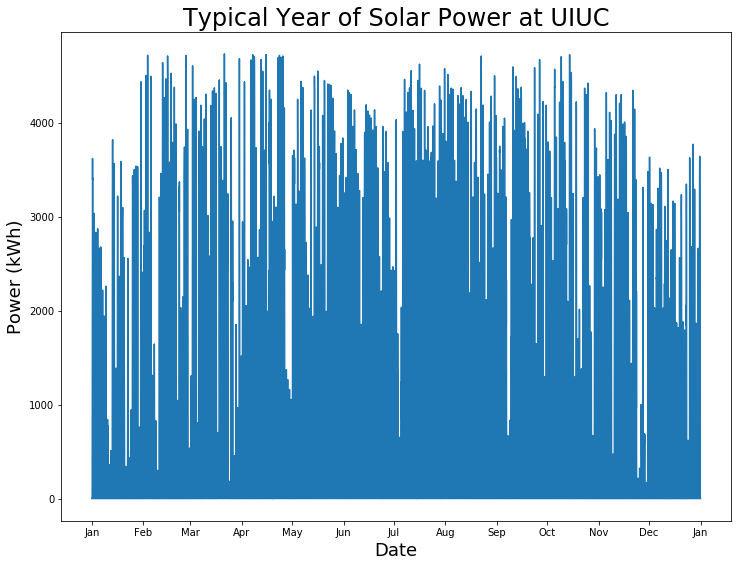

In [37]:
import matplotlib.dates as mdates


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

fig = plt.figure(figsize=(12,9), edgecolor='k', facecolor='w')
plt.plot(typical_solar.date, typical_solar.power_data)
plt.title('Typical Year of Solar Power at UIUC', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Power (kWh)',fontsize=18)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

In [43]:
print("Average typical solar power is {}".format(typical_solar.power_data.mean()))

Average typical solar power is 891.7475323262738


#### Constructing the ARMA

Following the lessons learned from generating ``demand_arma.xml``. 

In [72]:
!~/Research/raven/raven_framework ~/Research/2020-dotson-optimal-sizing/inputfiles/solar_arma.xml

CONDA
raven_libraries          /home/dotson/anaconda3/envs/raven_libraries
Running RAVEN in "opt" mode.
/home/dotson/Research/raven/framework/utils/utils.py:579: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, os.path
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/statsmodels/base/wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'colle

(    0.02 sec) STEP IOCOMBINED          : DEBUG           ->        Sleep time     : 0.005
(    0.02 sec) STEP IOCOMBINED          : DEBUG           ->        Initial seed   : None
(    0.02 sec) STEP IOCOMBINED          : DEBUG           ->        Output         : Class: DataObjects Type: HistorySet  Global name: typHist
(    0.02 sec) STEP IOCOMBINED          : DEBUG           ->        Input          : Class: Files Type:   Global name: typicalSolar
(    0.02 sec) STEP IOCOMBINED          : DEBUG           ->        Current Setting:
(    0.02 sec) SIMULATION               : DEBUG           -> Reading type RomTrainer with name trainARMA
(    0.02 sec) STEP ROM TRAINER         : DEBUG           -> move this tests to base class when it is ready for all the classes
(    0.02 sec) STEP ROM TRAINER         : DEBUG           -> ------Reading Completed for:
(    0.02 sec) STEP ROM TRAINER         : DEBUG           ->        Class          : RomTrainer      from <class 'Steps.Step'>
(    0.02

(    0.21 sec) ARMA                     : DEBUG           -> ... ... finished training target "power_data"
(    0.21 sec) ARMA                     : DEBUG           -> ... analyzing ARMA properties for target "power_norm" ...
(    0.22 sec) ARMA                     : DEBUG           -> ... ... training "power_norm"...
(    0.40 sec) ARMA                     : DEBUG           -> ... ... finished training target "power_norm"
(    0.41 sec) STEP ROM TRAINER         : Message         -> ***       Run finished        ***
(    0.41 sec) STEP ROM TRAINER         : Message         -> ***     Closing the step      ***
(    0.41 sec) STEP ROM TRAINER         : Message         -> ***        Step closed        ***
(    0.41 sec) SIMULATION               : Message         -> -- End step trainARMA of type: RomTrainer                      --

(    0.41 sec) SIMULATION               : Message         -> -- Beginning step sampleARMA of type: MultiRun                      --
(    0.41 sec) STEP MULTIRUN

In [73]:
synthetic_history = pd.read_csv(path+"solarHistories_2.csv")

Text(0.5, 1.0, 'Synthetic and Typical Solar Power Histories')

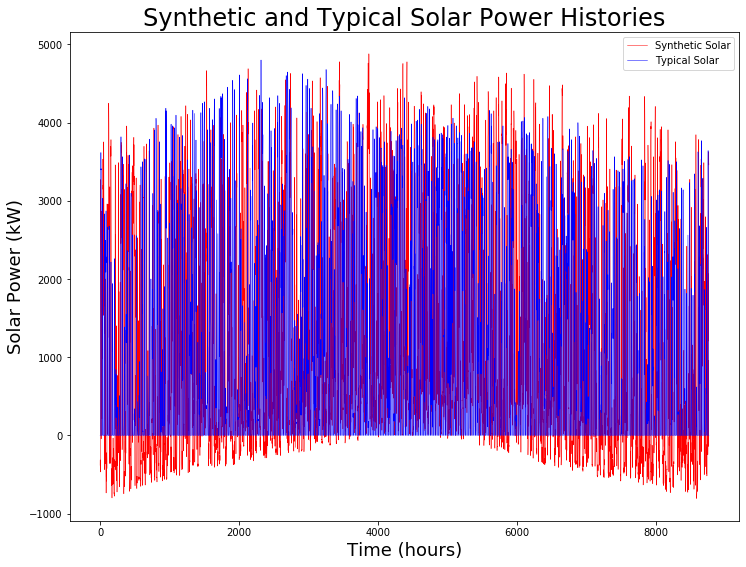

In [74]:
# plot synthetic history
fig = plt.figure(figsize=(12,9), edgecolor='k', facecolor='w')
plt.plot(synthetic_history['time'], synthetic_history['power_norm'], 
         color='r',lw = 0.5, label='Synthetic Solar')
plt.plot(typical_solar['time'], typical_solar['power_norm'], 
         color='b', lw=0.5, label='Typical Solar')
plt.ylabel("Solar Power (kW)", fontsize=18)
plt.xlabel("Time (hours)", fontsize=18)
plt.legend()
plt.title("Synthetic and Typical Solar Power Histories", fontsize=24)

#### Why are there negative values?

Let's check a few days of data... 

In [60]:
num = synthetic_history._get_numeric_data()

In [61]:
num[num<0]=0

Text(0.5, 1.0, 'Synthetic and Typical Solar Power Histories')

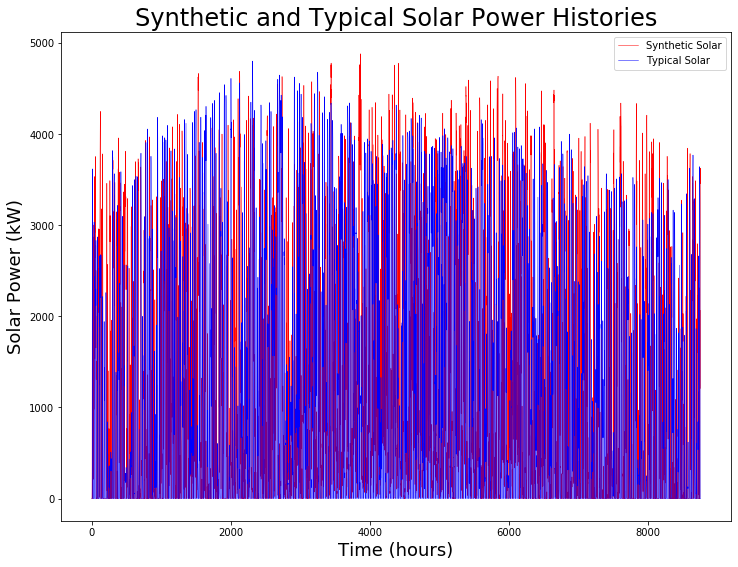

In [62]:
# plot synthetic history
fig = plt.figure(figsize=(12,9), edgecolor='k', facecolor='w')
plt.plot(synthetic_history['time'], synthetic_history['power_norm'], 
         color='r',lw = 0.5, label='Synthetic Solar')
plt.plot(typical_solar['time'], typical_solar['power_norm'], 
         color='b', lw=0.5, label='Typical Solar')
plt.ylabel("Solar Power (kW)", fontsize=18)
plt.xlabel("Time (hours)", fontsize=18)
plt.legend()
plt.title("Synthetic and Typical Solar Power Histories", fontsize=24)

In [63]:
synthetic_history.power_data.mean()

1020.3099716239973

In [65]:
print(typical_solar.power_data.mean())
print(typical_solar.power_data.std())

891.7475323262738
1324.2628479207976
